#Part 1: Text Processing and Exploratory Data Analysis

##PART 1.1: Data preparation

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
import string
import re

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
# Introduce your path to fashion_products_dataset.json

# Pau Path
# docs_path = '/content/drive/MyDrive/4 curs/Recuperació de la info/Final Project/fashion_products_dataset.json'

# Marc Path
docs_path = '/content/drive/MyDrive/Final Project/fashion_products_dataset.json'

# Clara Path
# docs_path = '/content/drive/MyDrive/4t/Recuperació de la Informació i Anàlisi de la Web/Final Project/fashion_products_dataset.json'

# Teacher Path - UPDATE WITH YOUR PATH
#docs_path =

In [108]:
# Load the JSON data into a DataFrame
df = pd.read_json(docs_path)

display(df.head())

_id actual_price average_rating brand  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999            3.9  York   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499            3.9  York   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999            3.9  York   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999            3.9  York   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999            3.9  York   

                   category          crawled_at  \
0  Clothing and Accessories 2021-02-10 20:11:51   
1  Clothing and Accessories 2021-02-10 20:11:52   
2  Clothing and Accessories 2021-02-10 20:11:52   
3  Clothing and Accessories 2021-02-10 20:11:53   
4  Clothing and Accessories 2021-02-10 20:11:53   

                                         description discount  \
0  Yorker trackpants made from 100% rich combed c...  69% off   
1  Yorker trackpants made from 100% rich combed c...  66% off   
2  Yorker trackpants made from 100% rich combed c...  68% off   
3  Yorker trackpants made from 100% rich combed c...  69% off   
4  Yorker trackpants made from 100% rich combed c...  68% off   

                                              images  out_of_stock  \
0  [https://rukminim1.flixcart.com/image/128/128/...         False   
1  [https://rukminim1.flixcart.com/image/128/128/...         False   
2  [https://rukminim1.flixcart.com/image/128/128/...         False   
3  [https://rukminim1.flixcart.com/image/128/128/...         False   
4  [https://rukminim1.flixcart.com/image/128/128/...         False   

                pid                                    product_details  \
0  TKPFCZ9EA7H5FYZH  [{'Style Code': '1005COMBO2'}, {'Closure': 'El...   
1  TKPFCZ9EJZV2UVRZ  [{'Style Code': '1005BLUE'}, {'Closure': 'Draw...   
2  TKPFCZ9EHFCY5Z4Y  [{'Style Code': '1005COMBO4'}, {'Closure': 'El...   
3  TKPFCZ9ESZZ7YWEF  [{'Style Code': '1005COMBO3'}, {'Closure': 'El...   
4  TKPFCZ9EVXKBSUD7  [{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...   

              seller selling_price sub_category  \
0  Shyam Enterprises           921   Bottomwear   
1  Shyam Enterprises           499   Bottomwear   
2  Shyam Enterprises           931   Bottomwear   
3  Shyam Enterprises           911   Bottomwear   
4  Shyam Enterprises           943   Bottomwear   

                                 title  \
0   Solid Women Multicolor Track Pants   
1           Solid Men Blue Track Pants   
2     Solid Men Multicolor Track Pants   
3   Solid Women Multicolor Track Pants   
4  Solid Women Brown, Grey Track Pants   

                                                 url  
0  https://www.flipkart.com/yorker-solid-men-mult...  
1  https://www.flipkart.com/yorker-solid-men-blue...  
2  https://www.flipkart.com/yorker-solid-men-mult...  
3  https://www.flipkart.com/yorker-solid-men-mult...  
4  https://www.flipkart.com/yorker-solid-men-brow...

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              28080 non-null  object        
 1   actual_price     28080 non-null  object        
 2   average_rating   28080 non-null  object        
 3   brand            28080 non-null  object        
 4   category         28080 non-null  object        
 5   crawled_at       28080 non-null  datetime64[ns]
 6   description      28080 non-null  object        
 7   discount         28080 non-null  object        
 8   images           28080 non-null  object        
 9   out_of_stock     28080 non-null  bool          
 10  pid              28080 non-null  object        
 11  product_details  28080 non-null  object        
 12  seller           28080 non-null  object        
 13  selling_price    28080 non-null  object        
 14  sub_category     28080 non-null  objec

**1.** In this section, we will prepare the text data for analysis. This involves several key steps:

  1.  **Removing stop words**: Eliminating common words like "the", "a", and "is" that don't add much meaning.
  2.  **Tokenization**: Breaking down the text into individual words or tokens.
  3.  **Removing punctuation marks**: Cleaning the text by getting rid of symbols like commas, periods, and exclamation points.
  4.  **Stemming**: Reducing words to their root form (e.g., "running" becomes "run").
  5.  **Other preprocessing**: We will also consider other steps like converting text to lowercase and handling potential special characters.


In [110]:
def token_cleaning_text(text):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    #put everything in lowercase
    text=  text.lower()
    #get rid of punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    #remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    #tokenize the sentence
    text=  text.split()
    #filter words to delete stop words and stemming them
    text=[word for word in text if word not in stop_words]
    text=[stemmer.stem(word) for word in text]
    return text

In [111]:
#apply the token_cleaning_text function to each value in the 'title' and 'description' columns and store the cleaned version in a new column
df['cleaned_title'] = df['title'].apply(token_cleaning_text)
df['cleaned_description'] = df['description'].apply(token_cleaning_text)

#combine the cleaned title and cleaned description columns into a single text field
df['cleaned_title_description'] = df['cleaned_title'] + df['cleaned_description']

display(df[['title', 'cleaned_title', 'description', 'cleaned_description', 'cleaned_title_description']].head())

title  \
0   Solid Women Multicolor Track Pants   
1           Solid Men Blue Track Pants   
2     Solid Men Multicolor Track Pants   
3   Solid Women Multicolor Track Pants   
4  Solid Women Brown, Grey Track Pants   

                              cleaned_title  \
0   [solid, women, multicolor, track, pant]   
1           [solid, men, blue, track, pant]   
2     [solid, men, multicolor, track, pant]   
3   [solid, women, multicolor, track, pant]   
4  [solid, women, brown, grey, track, pant]   

                                         description  \
0  Yorker trackpants made from 100% rich combed c...   
1  Yorker trackpants made from 100% rich combed c...   
2  Yorker trackpants made from 100% rich combed c...   
3  Yorker trackpants made from 100% rich combed c...   
4  Yorker trackpants made from 100% rich combed c...   

                                 cleaned_description  \
0  [yorker, trackpant, made, 100, rich, comb, cot...   
1  [yorker, trackpant, made, 100, rich, comb, cot...   
2  [yorker, trackpant, made, 100, rich, comb, cot...   
3  [yorker, trackpant, made, 100, rich, comb, cot...   
4  [yorker, trackpant, made, 100, rich, comb, cot...   

                           cleaned_title_description  
0  [solid, women, multicolor, track, pant, yorker...  
1  [solid, men, blue, track, pant, yorker, trackp...  
2  [solid, men, multicolor, track, pant, yorker, ...  
3  [solid, women, multicolor, track, pant, yorker...  
4  [solid, women, brown, grey, track, pant, yorke...

**2.** We will store the important attributes in a array for future returning operations.

In [112]:
important_attributes = [
    'pid',
    'title',
    'description',
    'brand',
    'category',
    'sub_category',
    'product_details',
    'seller',
    'out_of_stock',
    'selling_price',
    'discount',
    'actual_price',
    'average_rating',
    'url'
]

#keep only the important attributes for retrieval
df_important_attributes = df[important_attributes].copy()

display(df_important_attributes.head())

pid                                title  \
0  TKPFCZ9EA7H5FYZH   Solid Women Multicolor Track Pants   
1  TKPFCZ9EJZV2UVRZ           Solid Men Blue Track Pants   
2  TKPFCZ9EHFCY5Z4Y     Solid Men Multicolor Track Pants   
3  TKPFCZ9ESZZ7YWEF   Solid Women Multicolor Track Pants   
4  TKPFCZ9EVXKBSUD7  Solid Women Brown, Grey Track Pants   

                                         description brand  \
0  Yorker trackpants made from 100% rich combed c...  York   
1  Yorker trackpants made from 100% rich combed c...  York   
2  Yorker trackpants made from 100% rich combed c...  York   
3  Yorker trackpants made from 100% rich combed c...  York   
4  Yorker trackpants made from 100% rich combed c...  York   

                   category sub_category  \
0  Clothing and Accessories   Bottomwear   
1  Clothing and Accessories   Bottomwear   
2  Clothing and Accessories   Bottomwear   
3  Clothing and Accessories   Bottomwear   
4  Clothing and Accessories   Bottomwear   

                                     product_details             seller  \
0  [{'Style Code': '1005COMBO2'}, {'Closure': 'El...  Shyam Enterprises   
1  [{'Style Code': '1005BLUE'}, {'Closure': 'Draw...  Shyam Enterprises   
2  [{'Style Code': '1005COMBO4'}, {'Closure': 'El...  Shyam Enterprises   
3  [{'Style Code': '1005COMBO3'}, {'Closure': 'El...  Shyam Enterprises   
4  [{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...  Shyam Enterprises   

   out_of_stock selling_price discount actual_price average_rating  \
0         False           921  69% off        2,999            3.9   
1         False           499  66% off        1,499            3.9   
2         False           931  68% off        2,999            3.9   
3         False           911  69% off        2,999            3.9   
4         False           943  68% off        2,999            3.9   

                                                 url  
0  https://www.flipkart.com/yorker-solid-men-mult...  
1  https://www.flipkart.com/yorker-solid-men-blue...  
2  https://www.flipkart.com/yorker-solid-men-mult...  
3  https://www.flipkart.com/yorker-solid-men-mult...  
4  https://www.flipkart.com/yorker-solid-men-brow...

**3.** We will start by separating the different fields that we have in product_details. We will create a new attribute called product_{attribute} for each of them.

In [113]:
def extract_product_detail(product_details_list, key):
    if isinstance(product_details_list, list):
        for detail_dict in product_details_list:
            if isinstance(detail_dict, dict) and key in detail_dict:
                return detail_dict[key]
    # return None if the key is not found
    return None

#possible product attributes
producte_attributes = ["Style Code", "Closure", "Pockets", "Fabric", "Pattern", "Color"]

#create new columns by applying the extraction function
for attribute in producte_attributes:
    df[f'product_{attribute.lower().replace(" ", "_")}'] = df['product_details'].apply(lambda x: extract_product_detail(x, attribute))

#display the new columns along with the original product_details
display(df[['product_details'] + [f'product_{key.lower().replace(" ", "_")}' for key in producte_attributes]].head())

product_details product_style_code  \
0  [{'Style Code': '1005COMBO2'}, {'Closure': 'El...         1005COMBO2   
1  [{'Style Code': '1005BLUE'}, {'Closure': 'Draw...           1005BLUE   
2  [{'Style Code': '1005COMBO4'}, {'Closure': 'El...         1005COMBO4   
3  [{'Style Code': '1005COMBO3'}, {'Closure': 'El...         1005COMBO3   
4  [{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...         1005COMBO1   

       product_closure product_pockets product_fabric product_pattern  \
0              Elastic    Side Pockets   Cotton Blend           Solid   
1  Drawstring, Elastic    Side Pockets   Cotton Blend           Solid   
2              Elastic    Side Pockets   Cotton Blend           Solid   
3              Elastic    Side Pockets   Cotton Blend           Solid   
4  Drawstring, Elastic    Side Pockets   Cotton Blend           Solid   

  product_color  
0    Multicolor  
1          Blue  
2    Multicolor  
3    Multicolor  
4   Brown, Grey

In [114]:
#number of unique values for each column
unique_categories = df['category'].nunique()
unique_subcategories = df['sub_category'].nunique()
unique_brands = df['brand'].nunique()
unique_sellers = df['seller'].nunique()
unique_style_codes = df['product_style_code'].nunique()
unique_closures = df['product_closure'].nunique()
unique_pockets = df['product_pockets'].nunique()
unique_fabrics = df['product_fabric'].nunique()
unique_patterns = df['product_pattern'].nunique()
unique_colors = df['product_color'].nunique()

print(f"Number of unique categories: {unique_categories}")
print(f"Number of unique sub-categories: {unique_subcategories}")
print(f"Number of unique brands: {unique_brands}")
print(f"Number of unique sellers: {unique_sellers}")
print(f"Number of unique style codes: {unique_style_codes}")
print(f"Number of unique closures: {unique_closures}")
print(f"Number of unique pockets: {unique_pockets}")
print(f"Number of unique fabrics: {unique_fabrics}")
print(f"Number of unique patterns: {unique_patterns}")
print(f"Number of unique colors: {unique_colors}")

Number of unique categories: 4
Number of unique sub-categories: 24
Number of unique brands: 325
Number of unique sellers: 535
Number of unique style codes: 23263
Number of unique closures: 57
Number of unique pockets: 112
Number of unique fabrics: 244
Number of unique patterns: 118
Number of unique colors: 352


In [115]:
#unique values for category
for col in ['category', 'sub_category', 'brand', 'seller',
            'product_style_code', 'product_closure', 'product_pockets',
            'product_fabric', 'product_pattern', 'product_color']:
    print(f"Unique values for {col}:")
    print(df[col].unique()[:10])
    print("-" * 40)

Unique values for category:
['Clothing and Accessories' 'Bags, Wallets & Belts' 'Footwear' 'Toys']
----------------------------------------
Unique values for sub_category:
['Bottomwear' 'Clothing Accessories' 'Winter Wear' 'Raincoats' 'Topwear'
 'Innerwear and Swimwear' 'Kurtas, Ethnic Sets and Bottoms'
 'Blazers, Waistcoats and Suits' 'Tracksuits' 'Sleepwear']
----------------------------------------
Unique values for brand:
['York' 'ANGI' '' 'Man' 'TRANSPERAN' 'DISCOUNT OUTL' 'adidas Origina'
 'Fresh Fe' 'SayItLo' 'ShreeR']
----------------------------------------
Unique values for seller:
['Shyam Enterprises' 'SH ENTERPRISE' 'NextEdgeRetails' '' 'SHAKTICREATION'
 'FLIPKAT fashion' 'S P TRADERS' 'RetailNet'
 'RetailNet4.5Seller changed. Check for any changes in pricing and related informatio'
 'RAVR India']
----------------------------------------
Unique values for product_style_code:
['1005COMBO2' '1005BLUE' '1005COMBO4' '1005COMBO3' '1005COMBO1'
 '1005COMBO12' '1005NAVI' '1005DSKIN

Process the fields (category, sub_category, fabric, pattern, and color) by cleaning and merging them with the main token list for TF-IDF future analysis.

In [116]:
for col in ['category', 'sub_category', 'product_fabric', 'product_pattern', 'product_color']:
    #replace NaN, None, or empty values with empty string before applying the function
    df[col] = df[col].fillna('').astype(str).replace('None', '').replace('nan', '')
    df[f'cleaned_{col}'] = df[col].apply(token_cleaning_text)

df['cleaned_title_description_extra_fields'] = (
    df['cleaned_title_description']
    + df['cleaned_category']
    + df['cleaned_sub_category']
    + df['cleaned_product_fabric']
    + df['cleaned_product_pattern']
    + df['cleaned_product_color']
)

display(df[['cleaned_category', 'cleaned_sub_category', 'cleaned_product_fabric', 'cleaned_product_pattern', 'cleaned_product_color', 'cleaned_title_description_extra_fields']].head())

cleaned_category cleaned_sub_category cleaned_product_fabric  \
0  [cloth, accessori]         [bottomwear]        [cotton, blend]   
1  [cloth, accessori]         [bottomwear]        [cotton, blend]   
2  [cloth, accessori]         [bottomwear]        [cotton, blend]   
3  [cloth, accessori]         [bottomwear]        [cotton, blend]   
4  [cloth, accessori]         [bottomwear]        [cotton, blend]   

  cleaned_product_pattern cleaned_product_color  \
0                 [solid]          [multicolor]   
1                 [solid]                [blue]   
2                 [solid]          [multicolor]   
3                 [solid]          [multicolor]   
4                 [solid]         [brown, grey]   

              cleaned_title_description_extra_fields  
0  [solid, women, multicolor, track, pant, yorker...  
1  [solid, men, blue, track, pant, yorker, trackp...  
2  [solid, men, multicolor, track, pant, yorker, ...  
3  [solid, women, multicolor, track, pant, yorker...  
4  [solid, women, brown, grey, track, pant, yorke...

**4.** The fields out_of_stock, selling_price, discount, actual_price, and average_rating were converted to their appropriate data types to enable accurate filtering and numerical operations.

In [117]:
#convert 'actual_price', 'selling_price and 'average_rating' to numeric, handling commas and null values
df['actual_price'] = df['actual_price'].str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df['selling_price'] = df['selling_price'].str.replace(',', '', regex=False)
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

print(df[['actual_price', 'selling_price', 'average_rating']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual_price    27303 non-null  float64
 1   selling_price   28078 non-null  float64
 2   average_rating  25819 non-null  float64
dtypes: float64(3)
memory usage: 658.3 KB
None


In [118]:
#clean and convert the discount
df['discount'] = df['discount'].str.replace(' off', '', regex=False)
df['discount'] = df['discount'].str.replace('%', '', regex=False)
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
df['discount'] = df['discount'].astype('Int64')

print(df['discount'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 28080 entries, 0 to 28079
Series name: discount
Non-Null Count  Dtype
--------------  -----
27225 non-null  Int64
dtypes: Int64(1)
memory usage: 246.9 KB
None


We can see that some values have null values now we transformed to numerical some data that was stored as strings. For example the discount that now have null values were initially as an empty string. We can see what they looked like before the cleaning.

In [119]:
#find rows where 'discount' is null after conversion
null_discount_rows = df[df['discount'].isnull()]

#display these rows, including the original 'discount' column from df_important_attributes
display(df_important_attributes.loc[null_discount_rows.index, ['title', 'discount', 'actual_price', 'selling_price']].head(20))

title discount actual_price  \
1705                 Solid Women Polo Neck Blue T-Shirt                         
1734                           Men Striped Ankle Length                         
1891                       Solid Women Grey Track Pants                         
1922                   Full Sleeve Solid Men Sweatshirt                         
1949                         Solid Men Grey Track Pants                         
1950                  Solid Men Polo Neck Green T-Shirt                         
1953                Full Sleeve Solid Men Sports Jacket                         
1958                  Solid Men Polo Neck Green T-Shirt                         
1964  Original Cotton Half Cushion Women Ankle Lengt...                         
2020         Printed Women Round Neck Dark Blue T-Shirt                         
2024                Men Solid Ankle Length  (Pack of 3)                         
2060                       Men Self Design Ankle Length                         
2074                         Women Striped Ankle Length                         
2077                   Self Design Men Blue Track Pants                         
2083      Self Design Men Polo Neck Black, Grey T-Shirt                         
2107                Printed Men Round Neck Grey T-Shirt                         
2119             Women Solid Mid-Calf/Crew  (Pack of 3)                         
2189                      Solid Women Black Track Pants                         
2219                  Solid Men Polo Neck White T-Shirt                         
2234              Women Solid Ankle Length  (Pack of 3)                         

     selling_price  
1705         1,099  
1734           499  
1891         1,499  
1922         2,399  
1949         1,499  
1950         1,299  
1953         3,699  
1958         1,599  
1964           399  
2020         3,999  
2024           486  
2060           549  
2074           449  
2077         1,799  
2083         1,299  
2107         1,999  
2119           559  
2189         2,499  
2219         1,299  
2234           459

For more cleaned data we will assume that there was no discount so we will just set the actual_price to have the same value as the selling_price and we will put the discount to 0.

In [120]:
#fill null discount values with 0
df['discount'] = df['discount'].fillna(0)

#for rows where discount was null (and now 0), set actual_price equal to selling_price
df.loc[df['discount'] == 0, 'actual_price'] = df['selling_price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   _id                                     28080 non-null  object        
 1   actual_price                            28078 non-null  float64       
 2   average_rating                          25819 non-null  float64       
 3   brand                                   28080 non-null  object        
 4   category                                28080 non-null  object        
 5   crawled_at                              28080 non-null  datetime64[ns]
 6   description                             28080 non-null  object        
 7   discount                                28080 non-null  Int64         
 8   images                                  28080 non-null  object        
 9   out_of_stock                            28080 non-

##PART 1.2: Data analysis


### Textual data analysis

####In this section we examine the cleaned texts by analyzing word count distributions, determining vocabulary size, and creating word clouds to visualize frequent terms in titles and descriptions.

Word count distribution: here we will count the words in title and description and see around what values do they fall.


In [121]:
title_len = df['cleaned_title'].apply(len)
description_len = df['cleaned_description'].apply(len)

#we will put it one next to the other to compare easily the values
combined_description = pd.concat([title_len.describe(), description_len.describe()], axis=1)
display(combined_description)

cleaned_title  cleaned_description
count   28080.000000         28080.000000
mean        6.225819            18.490135
std         1.946551            26.232203
min         1.000000             0.000000
25%         5.000000             0.000000
50%         6.000000             9.000000
75%         7.000000            28.000000
max        31.000000           556.000000

What we can see from the counting:
The title got a mean of 6.2 words. For text based searching engines we might need more than that. Mixing the title and description will help to get better results with the queries as the description is around 18.5 words long. In great part of the cases (at least in more than 50%) this will be shorter so we will still have a short text for each line. More information should be added, like the color or the brand (as we did previously).


#### Determine vocabulary size:


We will store all the words that appear in the title and description and we will store them in a set. When we can see the size and we will have it for future usage, for exampel for future tf-idf models.



In [122]:
vocabulary = set()

for tokens in df['cleaned_title']:
    vocabulary.update(tokens)

for tokens in df['cleaned_description']:
    vocabulary.update(tokens)

vocabulary_size = len(vocabulary)
print(f"Total vocabulary size: {vocabulary_size}")

Total vocabulary size: 6136


#### Word clouds for the cleaned title and description columns.



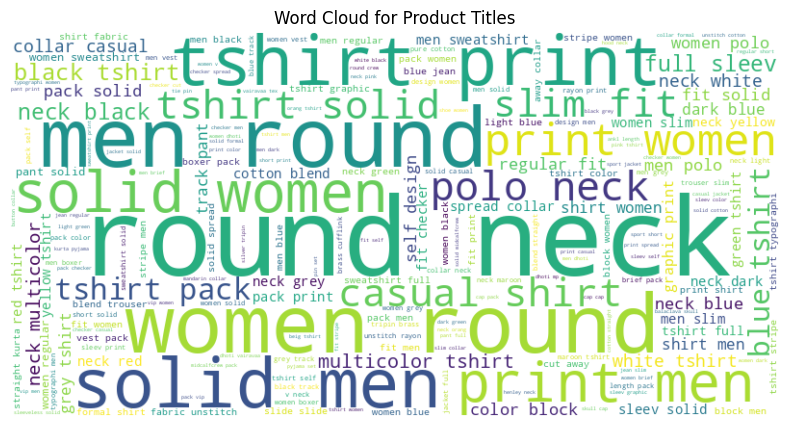

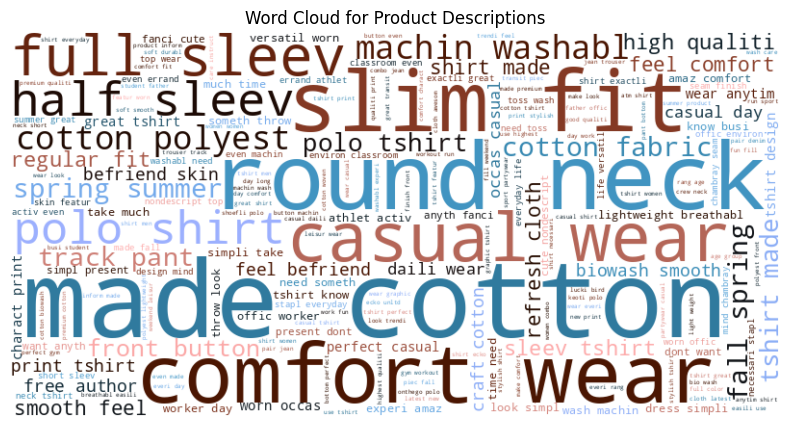

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combine all cleaned title tokens into a single string
title_text = " ".join([" ".join(tokens) for tokens in df['cleaned_title']])

#create and generate the word cloud for titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

#display the word cloud for titles
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Titles')
plt.show()

#combine all cleaned description tokens into a single string
description_text = " ".join([" ".join(tokens) for tokens in df['cleaned_description']])

# create and generate the word cloud for descriptions
description_wordcloud = WordCloud(width=800, height=400, colormap="berlin", background_color='white').generate(description_text)

#display the word cloud for descriptions
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions')
plt.show()

We can see that the most common words are those that describe materials and characteristics. Some of the most used words are in both title and description. We can also notice that rather than have words alone what we see more repeated is two-concepts to define types of clothes or characteristics of it.

###Numerical data analysis
####In this section, we will perform some exploratory data analysis on the numerical variables in the dataset.


First, we will use boxplots to visualize the distribution and detect outliers, and distribution plots to show the frequency of values. This will help us identify patterns, extreme values, and better understand the behavior of prices, discounts, and ratings.

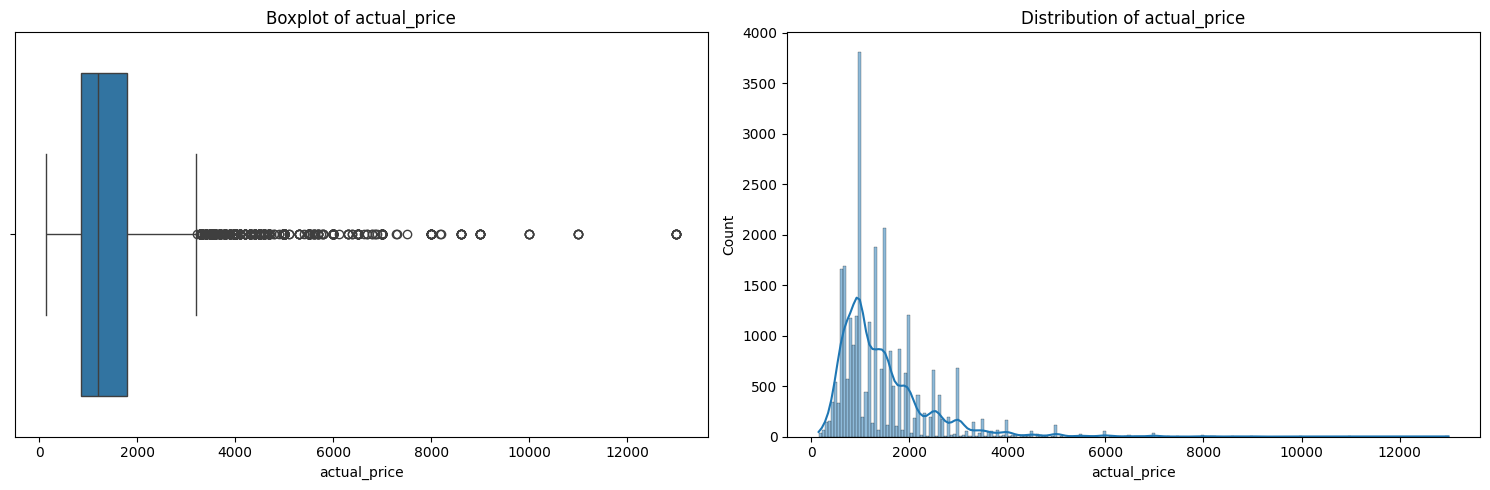

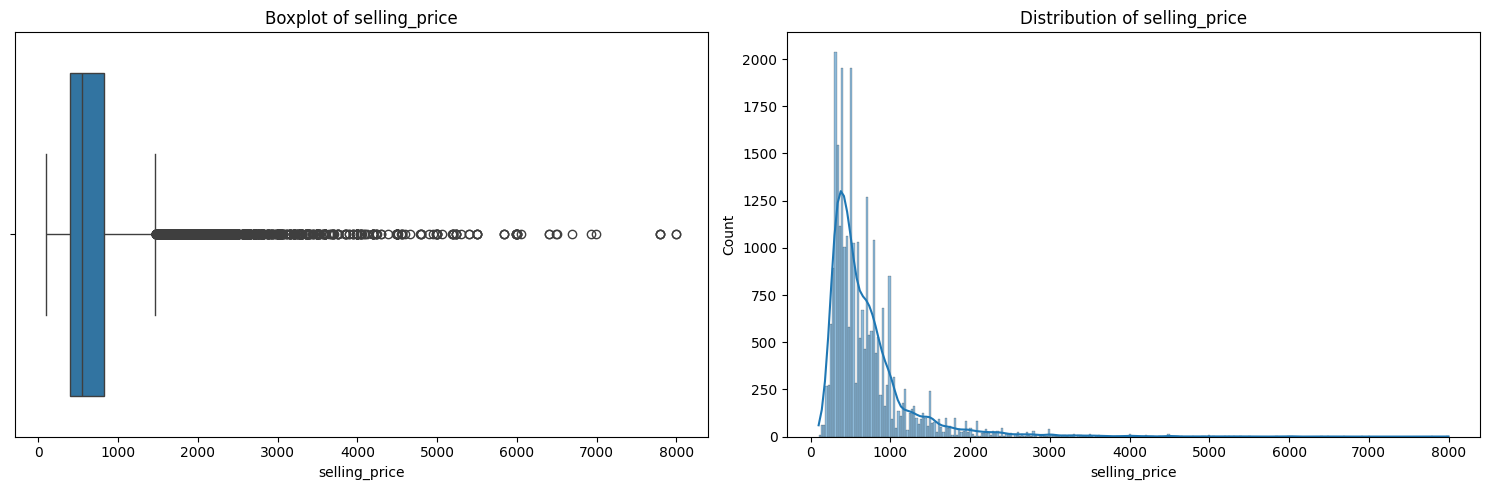

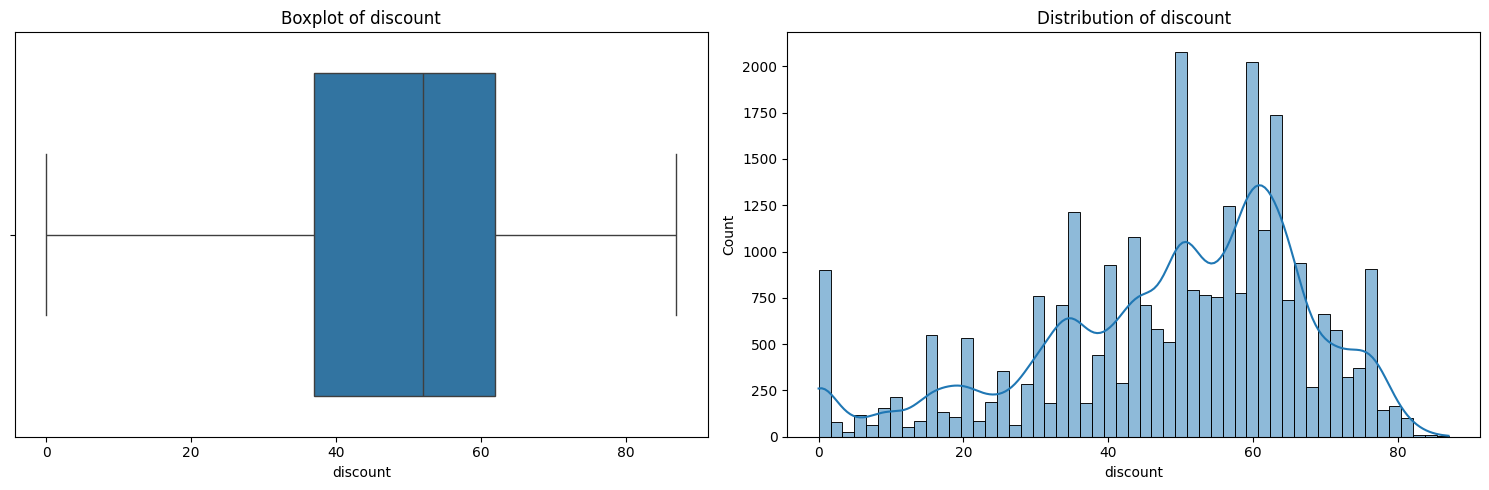

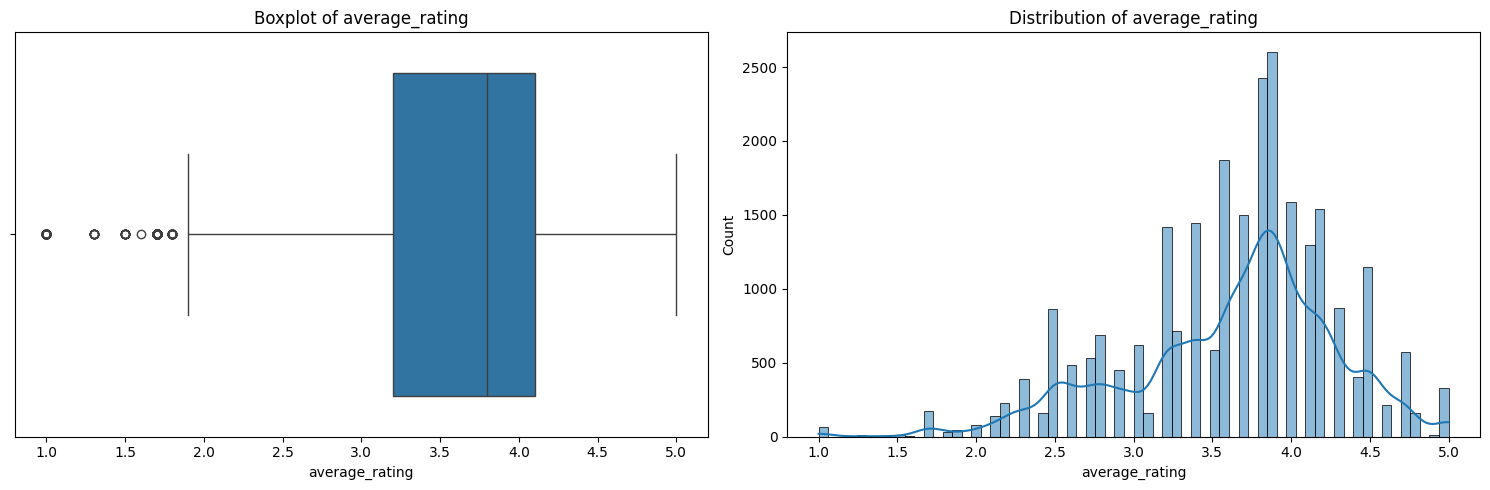

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns
numerical_cols = ['actual_price', 'selling_price', 'discount', 'average_rating']

# Create boxplots and distribution plots for each numerical column
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    # Distribution plot
    sns.histplot(df[col].dropna(), kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

The distribution of all four numerical attributes are more or less continuous, they don't have a clear discrete distribution.

Almost every item in the dataset has a discount. We can see that less than 1000 got 0% discount and that most of them is concentrated between values from 40% to 60%

Both actual and selling prices show wide ranges, but there is a clear clustering around moderate price levels.



Next, we identify the products with the highest ratings to understand which items receive the best user feedback.



In [125]:
#sort by average_rating in descending order
top_rated_products = df.sort_values(by='average_rating', ascending=False)

#display top 10 with relevant columns
display(top_rated_products[['title', 'brand', 'average_rating', 'selling_price']].head(10))

title         brand  \
27767          Solid Women Round Neck Blue T-Shirt           Oka   
12332      Printed Women Hooded Neck Black T-Shirt       ATTIITU   
12279       Printed Women Hooded Neck Grey T-Shirt       ATTIITU   
23852    Graphic Print Men Round Neck Blue T-Shirt  Free Authori   
12235  Solid Women Round Neck White, Black T-Shirt       ATTIITU   
12242                           ATTIITUDE Men Vest                 
12243                           ATTIITUDE Men Vest                 
8477                                  Women Trunks             V   
1923           Self Design Women Black Track Pants          REEB   
18049       Printed Women Round Neck White T-Shirt     yellowvib   

       average_rating  selling_price  
27767             5.0          385.0  
12332             5.0          549.0  
12279             5.0          909.0  
23852             5.0          519.0  
12235             5.0          649.0  
12242             5.0          937.0  
12243             5.0          937.0  
8477              5.0          420.0  
1923              5.0         2659.0  
18049             5.0          870.0

These top-rated products represent the most appreciated items in the catalog. We can not know how relevant this ratings are. As we don't have any information about where this rating comes from. We do not know how many ratings there are under this average, if they are rating the overall experience, which involves the seller; or if it's just a rating of the product, where it would only involve the brand.
We cannot make final conclusions but we can see that some brands got more than one product with good ratings.

We will look more into it in the following cells.

We analyze the brands with the lowest selling price to identify the most affordable options and the more expensive ones.



In [126]:
#group by 'brand' and calculate the average selling price and product count
brand_price_stats = df.groupby('brand').agg(
    average_selling_price=('selling_price', 'mean'),
    product_count=('brand', 'count')
)

#sort by average_selling_price in ascending order for lowest prices
lowest_priced_brands = brand_price_stats.sort_values(by='average_selling_price', ascending=True).head(5)

#display the 5 most affordable brands with their average selling price and product count
print("Top 5 Most Affordable Brands by Average Selling Price:")
display(lowest_priced_brands)

#sort by average_selling_price in descending order for highest prices
highest_priced_brands = brand_price_stats.sort_values(by='average_selling_price', ascending=False).head(5)

#display the 5 most expensive brands by Average Selling Price
print("\nTop 5 Most Expensive Brands by Average Selling Price:")
display(highest_priced_brands)

Top 5 Most Affordable Brands by Average Selling Price:


average_selling_price  product_count
brand                                                  
ina gro                            120.0              3
Mohan Reta                         140.0              1
K J TRADE                          149.0              1
your shopping sto                  158.5              2
Kno                                173.0              1


Top 5 Most Expensive Brands by Average Selling Price:


average_selling_price  product_count
brand                                              
G                        4012.375000             56
Lar                      3724.000000              8
Lev                      2316.880000            275
Social Pige              1999.000000              3
REEBOK CLASSI            1723.506667             75

What we can conclude of this analisys is that there are very expensive brand and others that are way more cheap. We have to keep in mind this when developing the search engine, to give more weight to certain types of brands.

Now, we are going to identify the products with the highest and lowest discount percentage to understand the most prominent offers.


In [127]:
#sort by discount in descending order
highest_discount_products = df.sort_values(by='discount', ascending=False)

#display top 10 with relevant columns
display(highest_discount_products[['title', 'brand', 'discount', 'selling_price']].head(10))
display(highest_discount_products[['title', 'brand', 'discount', 'selling_price']].tail(10))

title      brand  discount  \
906               Printed Women Round Neck White T-Shirt   Jack Roy        87   
903               Printed Women Round Neck White T-Shirt   Jack Roy        86   
902                Printed Women Round Neck Grey T-Shirt   Jack Roy        86   
18249  Printed Men Round Neck Multicolor T-Shirt  (Pa...  yellowvib        85   
18093       Printed Men Collared Neck Multicolor T-Shirt  yellowvib        84   
3102          Color Block Women Round Neck Green T-Shirt        REF        84   
91                   nu-Lite Satin Tie & Cufflink  (Red)                   84   
18017           Printed Men Mandarin Collar Blue T-Shirt  yellowvib        84   
9811                                  Solid Balclava Cap     Gracew        84   
18016              Printed Women Round Neck Blue T-Shirt  yellowvib        84   

       selling_price  
906            128.0  
903            136.0  
902            136.0  
18249          449.0  
18093          230.0  
3102           228.0  
91             499.0  
18017          282.0  
9811           228.0  
18016          280.0

title             brand  \
13241                        Men Brief  (Pack of 5)        VIKING.INE   
13240                        Men Brief  (Pack of 5)        VIKING.INE   
3013     Full Sleeve Graphic Print Women Sweatshirt              AXMA   
5768                 Wb-907 Regular Men Green Jeans               Wab   
5767                            Slim Men Grey Jeans               Wab   
15879  Graphic Print Women Round Neck Black T-Shirt  HUMANITY ORIGINA   
3071         Full Sleeve Self Design Men Sweatshirt              AXMA   
3070         Solid V Neck Casual Women Grey Sweater              AXMA   
3050             Solid Women Round Neck Red T-Shirt              AXMA   
13246                      Women Brief  (Pack of 5)        VIKING.INE   

       discount  selling_price  
13241         0          699.0  
13240         0          699.0  
3013          0         1395.0  
5768          0         1299.0  
5767          0         1599.0  
15879         0          699.0  
3071          0         1475.0  
3070          0         1295.0  
3050          0          495.0  
13246         0          699.0

We can see that the same brand offers the highest discounts, around 85%, but for now, we cannot draw any further conclusions.

We can look if the sub-categories are attribuated to a category or if they are all mixed. We will do this to know if categories and subcategories are associated.

In [128]:
#create a cross-tabulation of category and sub_category
category_subcategory_crosstab = pd.crosstab(df['sub_category'], df['category'])

#display the cross-tabulation
display(category_subcategory_crosstab)

category                              Bags, Wallets & Belts  \
sub_category                                                  
Blazers, Waistcoats and Suits                             0   
Bottomwear                                                0   
Brand Trunk Bags, Wallets & Belts                         1   
Clothing Accessories                                      0   
Crocks Club Clothing and Accessories                      0   
Fabrics                                                   0   
INSPIRE Clothing and Accessories                          0   
Innerwear and Swimwear                                    0   
Inspire Clothing and Accessories                          0   
Kurtas, Ethnic Sets and Bottoms                           0   
Men's Footwear                                            0   
Party Supplies                                            0   
Raincoats                                                 0   
Roy Clothing and Accessories                              0   
SUNSHOPPING Bags, Wallets & Belts                        10   
Sleepwear                                                 0   
Sunshopping Bags, Wallets & Belts                        21   
Topwear                                                   0   
Tracksuits                                                0   
Uber Urban Clothing and Accessories                       0   
Winsome Deal Bags, Wallets & Belts                        4   
Winter Wear                                               0   
YOFAMA Bags, Wallets & Belts                              4   
mentiezi Bags, Wallets & Belts                            1   

category                              Clothing and Accessories  Footwear  Toys  
sub_category                                                                    
Blazers, Waistcoats and Suits                              103         0     0  
Bottomwear                                                3666         0     0  
Brand Trunk Bags, Wallets & Belts                            0         0     0  
Clothing Accessories                                      1742         0     0  
Crocks Club Clothing and Accessories                        15         0     0  
Fabrics                                                    534         0     0  
INSPIRE Clothing and Accessories                             4         0     0  
Innerwear and Swimwear                                    1762         0     0  
Inspire Clothing and Accessories                            23         0     0  
Kurtas, Ethnic Sets and Bottoms                           1180         0     0  
Men's Footwear                                               0       920     0  
Party Supplies                                               0         0     1  
Raincoats                                                   34         0     0  
Roy Clothing and Accessories                                12         0     0  
SUNSHOPPING Bags, Wallets & Belts                            0         0     0  
Sleepwear                                                  122         0     0  
Sunshopping Bags, Wallets & Belts                            0         0     0  
Topwear                                                  15310         0     0  
Tracksuits                                                  90         0     0  
Uber Urban Clothing and Accessories                         28         0     0  
Winsome Deal Bags, Wallets & Belts                           0         0     0  
Winter Wear                                               2493         0     0  
YOFAMA Bags, Wallets & Belts                                 0         0     0  
mentiezi Bags, Wallets & Belts                               0         0     0

We can see that each sub category is attribuated to a single category, so this two attributes could be mixed so we avoid considering imposible combinations of category and subcategory.

In the following cells, we explore which sellers and brands have the most presence in the catalog.



In [129]:
top_sellers_by_product_count = df['seller'].value_counts().head(10)
print("Top 10 Sellers by Product Count:")
display(top_sellers_by_product_count)


Top 10 Sellers by Product Count:


seller
                         1643
RetailNet                1411
SandSMarketing            887
BioworldMerchandising     842
ARBOR                     783
Keoti                     660
AFFGARMENTS               587
Black Beatle              548
AMALGUS ENTERPRISE        477
Tayab Manch Fashions      436
Name: count, dtype: int64

We see that there are big sellers in the dataset. And also that some of them got null values in this column.

Let's see how brands are puntuated and how relevant they are. To do this we can group by 'brand' and calculate the mean of 'average_rating', then display the top 10 to have an idea. We can also do the same in the inverse, order them by their average rating and also see how many times they appear.



In [130]:
#group by 'brand' and calculate the number of products and the average rating
brand_stats = df.groupby('brand').agg(
    product_count=('brand', 'count'),
    average_rating=('average_rating', 'mean')
).sort_values(by='product_count', ascending=False)

#display the top 10 brands by product count with their average rating
print("\nTop 10 Brands by Product Count and Average Rating:")
display(brand_stats.head(10))

#group by 'brand' and calculate the mean of 'average_rating', then display the top 10.
top_brands_by_average_rating = df.groupby('brand').agg(
    average_rating=('average_rating', 'mean'),
    product_count=('brand', 'count')
).sort_values(by='average_rating', ascending=False).head(10)

print("\nTop 10 Brands by Average Rating:")
display(top_brands_by_average_rating)


Top 10 Brands by Product Count and Average Rating:


product_count  average_rating
brand                                      
                       2009        3.711452
ECKO Unl                951        2.705660
Free Authori            860        3.906835
ARBO                    806        4.101500
REEB                    802        4.012531
Pu                      798        4.058438
True Bl                 793        3.460536
Keo                     660        3.820455
Amp                     585        3.414872
Black Beat              548        3.904745


Top 10 Brands by Average Rating:


average_rating  product_count
brand                                            
VARTe                     5.000000             44
MILD                      5.000000              9
VIKING.INE                4.640000              7
SORA                      4.609459             74
COL                       4.550000              2
Modest Ci                 4.500000              1
PixF                      4.462195            429
Cots                      4.444043            277
GYMBROTHE                 4.407143             28
JUARI BE A GENTLEM        4.400000              5

We can see we have different types of brands in the top of the ratings.


Finally, we will analyze and report the distribution of out_of_stock status to understand how much of the offer is currently accessible.


In [131]:
#calculate the value counts for the 'out_of_stock' column
out_of_stock_counts = df['out_of_stock'].value_counts()

#print the value counts
print("Distribution of Out of Stock Status (Counts):")
display(out_of_stock_counts)

#calculate the percentage distribution of 'out_of_stock' status
out_of_stock_percentage = df['out_of_stock'].value_counts(normalize=True) * 100

#print the percentage distribution
print("\nDistribution of Out of Stock Status (Percentage):")
display(out_of_stock_percentage)

Distribution of Out of Stock Status (Counts):


out_of_stock
False    26436
True      1644
Name: count, dtype: int64


Distribution of Out of Stock Status (Percentage):


out_of_stock
False    94.145299
True      5.854701
Name: proportion, dtype: float64

Most products remain in stock, although a notable portion is unavailable.
This feature is very important when ordering the items. We should prioritize items that are in stock over items that are out of stock when ordering them.


# Part 2: Indexing and evaluation



## 2.1 Indexing



### 2.1.1 Inverted index

The cleaned data is in the variable "df", which contains the data as we got it and the new transformed features we created by cleaning and treating the data, so we will use this dataframe.

We will use the merged text feature we created in the first part.

In [132]:
def create_index(data):
    index = defaultdict(list) # store unique document IDs
    title_index = {} # dictionary to map page titles to page ids

    for _, row in data.iterrows(): # iterate over DataFrame rows
        doc_id = row['pid'] # 'pid' is the document ID
        title = row['title'] # 'title' is the document title
        title_index[doc_id] = title

        # use the cleaned_title_description_extra_fields for indexing
        terms = row['cleaned_title_description_extra_fields']
        current_page_index = {}

        for position, term in enumerate(terms): # terms contains all the tokens from cleaned_title_description_extra_fields column

            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[doc_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term, posting in current_page_index.items():
          index[term].append(posting)

    return index, title_index

In [133]:
inverted_index, title_index = create_index(df)
print("Inverted Index:")
for term, doc_ids in list(inverted_index.items())[:20]:
    print(f"{term}: {doc_ids}")

print("\nTitle Index:")
for doc_id, title in list(title_index.items())[:20]:
    print(f"{doc_id}: {title}")

Inverted Index:
solid: [['TKPFCZ9EA7H5FYZH', array('I', [0, 31])], ['TKPFCZ9EJZV2UVRZ', array('I', [0, 31])], ['TKPFCZ9EHFCY5Z4Y', array('I', [0, 31])], ['TKPFCZ9ESZZ7YWEF', array('I', [0, 31])], ['TKPFCZ9EVXKBSUD7', array('I', [0, 32])], ['TKPFCZ9EFK9DNWDA', array('I', [0, 31])], ['TKPFDABN3GXYPFHE', array('I', [0, 32])], ['TKPFCZ9ESGZYT8NH', array('I', [0, 31])], ['TKPFCZ9DYU33FFXS', array('I', [0, 31])], ['TKPFDABN4NQFVKZY', array('I', [0, 31])], ['TKPFZFSHHACG3FHC', array('I', [0, 10])], ['TKPFZFSHQPDRGZTM', array('I', [0, 10])], ['TKPFZFSH3F9ZA7C6', array('I', [0, 10])], ['TKPFCZ9EHCNAPKPU', array('I', [0, 31])], ['TKPFDACEXAWUHGR7', array('I', [0, 32])], ['TKPFD3K62JB9PEMR', array('I', [0, 31])], ['TKPFCZ9EZDPZR5AH', array('I', [0, 31])], ['TKPFWBGVGU9FCAYX', array('I', [0, 11])], ['TKPFCZ9EVM2GZ4GF', array('I', [0, 31])], ['TKPFWAG7YFWPMG5Y', array('I', [0, 10])], ['TKPFCZ9E2UC3DR3F', array('I', [0, 32])], ['TKPFCZ9ECDYYDNKA', array('I', [0, 32])], ['SWTFYHP2QQQYEGRJ', array('I'

In [134]:
print("First 10 Index results for the term 'cottton': \n{}".format(inverted_index['cotton'][:10]))

First 10 Index results for the term 'cottton': 
[['TKPFCZ9EA7H5FYZH', array('I', [11, 29])], ['TKPFCZ9EJZV2UVRZ', array('I', [11, 29])], ['TKPFCZ9EHFCY5Z4Y', array('I', [11, 29])], ['TKPFCZ9ESZZ7YWEF', array('I', [11, 29])], ['TKPFCZ9EVXKBSUD7', array('I', [12, 30])], ['TKPFCZ9EFK9DNWDA', array('I', [11, 29])], ['TKPFDABN3GXYPFHE', array('I', [12, 30])], ['TKPFCZ9ESGZYT8NH', array('I', [11, 29])], ['TKPFCZ9DYU33FFXS', array('I', [11, 29])], ['TKPFDABN4NQFVKZY', array('I', [11, 29])]]


### 2.1.2 Test query proposals, TF-IDF algorithm implementation and product ranking results:

To choose the queries we first want to visualize the terms based on popularity, frequency and TF-IDF results, in this way we can select the ones we believe are most appropriate. To do this, we must implement the create_index_tfidf function that will do the same as the creation of the previous index, but will also calculate the term frequency, document frequency and the inverse values ​​of the document frequency for each token. We can print these results to see how to make creative queries that could be real and reasonable for a user's query.

In [135]:
def create_index_tfidf(data):

    num_documents = len(data)
    index = defaultdict(list)
    tf = defaultdict(list)
    df = defaultdict(int)
    idf = defaultdict(float)

    for _, row in data.iterrows():
        doc_id = row["pid"]
        terms = row["cleaned_title_description_extra_fields"]
        current_page_index = {}
        for position, term in enumerate(terms):
            try:
                current_page_index[term][1].append(position)
            except:
                current_page_index[term] = [doc_id, array('I', [position])]

        norm = 0
        for term, posting in current_page_index.items():

            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)
        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term
            tf[term].append(np.round(len(posting[1]) / norm, 4))
            #increment the doc frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)
    # Compute IDF
    for term in df:
        idf[term] = np.round(np.log(float(num_documents / df[term])), 4)
    return index, tf, df, idf


We call the new index function to store the tf, df and idf values, which will be useful in the following steps.

In [136]:
index, tf, df_sol, idf = create_index_tfidf(df)

To rank the documents/products for each query, we used the same function as in Lab 2, but we added the following condition: conjunctive queries (AND). This means that every returned document/product must contain all the words from the query in order to be considered a match.

Therefore, we first go through all the terms in the query and store in a general list all the documents that contain at least one of the terms. Then, we perform an intersection to keep only the documents that contain all the terms. In this way, we ensure that only documents meeting this condition are added to the doc_vectors list, which contains the relevant documents for a given query.

In [137]:
def rank_documents(terms, docs, index, idf, tf):
    result_docs = []
    doc_scores = []

    #for each term in the query (terms) obtain the set of documents that contain it
    docs_with_query_terms = []
    for term in terms:
        if term in index:
          #the term appears in at least one document because it's present in the index
          #get all documents where the term appears
          term_docs = {doc for doc, _ in index[term]}
          docs_with_query_terms.append(term_docs)

    # if no query terms are found in the index, there are no matching documents
    if not docs_with_query_terms:
        print("No query terms in the index")
        return result_docs, doc_scores

    # intersection, keep only documents that contain all query terms
    docs_with_all_query_terms = set.intersection(*docs_with_query_terms)
    if not docs_with_all_query_terms:
        print("No documents with all query terms")
        return result_docs, doc_scores

    # #interested only on the element of the docVector corresponding to the query terms
    # # remaining elements 0
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs_with_all_query_terms:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # check if multiply for idf

    # Calculate the score of each doc, cosine similarity between queyVector and each docVector

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)

    return result_docs, doc_scores

In [138]:
def search_tf_idf(query, index):

    query = token_cleaning_text(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]

            # docs = docs Union term_docs
            docs |= set(term_docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs, doc_scores = rank_documents(query, docs, index, idf, tf)
    return ranked_docs, doc_scores

Now that we have the ranking function, search_tf_idf function, the df and idf values, and we can calculate tf-idf. From here, we can proceed to display the results and think of interesting queries to evaluate our search engine.

In [139]:
# sort the terms by the number of documents in which they appear (DF)

top_df_terms = sorted(df_sol.items(), key=lambda x: x[1], reverse=True)[:20]

print("Top 20 most frequent terms by DF:")
for term, freq in top_df_terms:
    print(f"{term}: {freq}")

Top 20 most frequent terms by DF:
accessori: 27189
cloth: 27121
cotton: 19497
topwear: 15310
men: 13855
blend: 13536
women: 13434
tshirt: 12891
neck: 12224
solid: 11912
print: 9383
round: 8646
wear: 7446
fit: 7376
blue: 6801
casual: 6744
comfort: 6556
shirt: 5718
pure: 5488
black: 5237


The most frequent terms by DF are very common and general clothing attributes used to describe fashion products, such as accessori, cloth, cotton, or gender distinctions. Since these terms appear so frequently, they are less useful for identifying specific products.

In [140]:
#sort the terms by their IDF score, most rarer ones first
top_idf_terms = sorted(idf.items(), key=lambda x: x[1], reverse=True)[:20]

print("Top 20 terms with the highest IDF:")
for term, score in top_idf_terms:
    print(f"{term}: {score}")

Top 20 terms with the highest IDF:
acort: 10.2428
embed: 10.2428
heavier: 10.2428
inbuilt: 10.2428
warmup: 10.2428
honour: 10.2428
monogramprint: 10.2428
cube: 10.2428
infil: 10.2428
ryv: 10.2428
unexpect: 10.2428
lockup: 10.2428
lng: 10.2428
shrt: 10.2428
sp: 10.2428
rippl: 10.2428
shatter: 10.2428
diag: 10.2428
cdcdtee: 10.2428
flashback: 10.2428


The top terms with the highest IDF appear in very few documents, which makes them very valuable for the search engine to better differentiate between products. Some of these terms make sense, while others seem unusual, such as acort or ryv. On the other hand, some terms can be very helpful, like embed or monogramprint, as they describe particular details.

In [141]:
#compute TF-IDF weight for each term: TF values with its IDF score
term_weights = {term: np.sum(np.array(tf_values) * idf[term]) for term, tf_values in tf.items()}
#sort the terms by their total TF-IDF weigh
top_tfidf_terms = sorted(term_weights.items(), key=lambda x: x[1], reverse=True)[:20]

print("Top 20 terms with the highest TF-IDF weight:")
for term, weight in top_tfidf_terms:
    print(f"{term}: {weight}")

Top 20 terms with the highest TF-IDF weight:
print: 4108.23739998
solid: 3252.8906637500004
tshirt: 2817.2701318500003
blue: 2333.7045541999996
shirt: 2272.61436572
men: 2189.86550104
women: 2150.2776456799998
round: 2076.317473
neck: 2047.6790838499996
black: 2035.8545176900002
blend: 1950.16090252
wear: 1891.8548151599998
fit: 1883.12636496
footwear: 1851.8853534
casual: 1762.8542395999998
cotton: 1731.9310099200002
pure: 1729.55914475
topwear: 1694.71489446
multicolor: 1637.30634927
slim: 1633.3962119999997


The top TF-IDF terms include words that are both frequent in some documents and distinctive across the collection. As in the previous outputs, we can see that some terms make sense, while others seem less realistic in a user query. Some of these words also appeared in the top 20 DF or IDF lists, while others are not as common or distinctive but can still play an important role in queries, as they may be frequent and useful for users searching for products that meet specific criteria.

Based on some of the previous results, we came up with five example queries that makes sense and seems realistic.

In [142]:
test_queries = [
    "cotton t-shirt men",
    "women winter jacket",
    "sports shoes running",
    "formal shirt slim fit",
    "casual footwear black"
]

print("Proposed test queries:")
for q in test_queries:
    print("-", q)

Proposed test queries:
- cotton t-shirt men
- women winter jacket
- sports shoes running
- formal shirt slim fit
- casual footwear black


In [143]:
for q in test_queries:
    print(f"\nQuery: {q}")
    ranked_docs, _ = search_tf_idf(q, index)
    print(f"Top results for '{q}': {ranked_docs[:10]}")



Query: cotton t-shirt men
Top results for 'cotton t-shirt men': ['TSHFHTGBXB3ENHWH', 'TSHFHTGBHE7HGXKT', 'TSHFVR8F4QDGJAP4', 'TSHFDVE6JNWBGJ2W', 'TSHFGZKNRCNSQ64A', 'TSHFGZKNBYBZ9FAJ', 'TSHFN3V5FBWMFE2J', 'TSHFN3V5BH32EZQF', 'TSHFN3V59WS2G8U4', 'TSHFF75PHCFAHE7Z']

Query: women winter jacket
Top results for 'women winter jacket': ['JCKFWYTHH3B5GKWS', 'JCKFWYNCWEHNZCTJ', 'JCKFW7ERKBA4BHY3', 'JCKFVVHNUHUHMYSN', 'JCKFVVHNHW89CS4E', 'JCKFVVHNG3ME8HYZ', 'JCKFVVHNFQYBYNGH', 'JCKFVVHNFANGGWNP', 'JCKFVVHN72FTTT9B', 'JCKFU9APAQJBN23B']

Query: sports shoes running
Top results for 'sports shoes running': ['SHOFN3EJZVGC6GH8', 'SHOFN3EJVGC9VXYT', 'SHOFN3EJHXHGSGUC', 'SHOFN3EFNYGBKZT7', 'SHOFUH9JBHVZC5TU', 'SHOFG5TXSM7M57MY', 'SHOF98H4X8PU3EGW', 'SHOFVGHHVVUZGFA6', 'SHOFUWMJ9CMSKHUD', 'SHOFUH52SH3EQDH5']

Query: formal shirt slim fit
Top results for 'formal shirt slim fit': ['SHTFDYVVNDXJQWWV', 'SHTFDYU42BPWHM3Y', 'SHTFDYRQRYGTW4PX', 'SHTFDYPHFAB6UKF8', 'SHTFDYSQZ9AG7ZTV', 'SHTFW53YCYWCJGHD', 'SHT

As you can see, there are more than 10 results for these queries, which makes them reasonable, there are products that can meet these requirements.

Enter one of the proposed queries or one of your options.

In [144]:
print("Insert your query :\n")
query = input()
ranked_docs, doc_scores = search_tf_idf(query, index)
top = 10
if ranked_docs == []:
    print("No results found, try again")
    query = input()
    ranked_docs, doc_scores = search_tf_idf(query, index)

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))

for d_id in ranked_docs[:top]:
    print("document_id= {} - document_title: {}".format(d_id, title_index.get(d_id, "Unknown title")))


Insert your query :

blue denim

Top 10 results out of 768 for the searched query:

document_id= SHTEWNDGGSFSGQZU - document_title: Women Slim Fit Solid Spread Collar Casual Shirt
document_id= SRTFVEQPDREMKKBW - document_title: Solid Women Denim Blue Denim Shorts
document_id= SRTFZGPJFAA6D9NA - document_title: Solid Women Denim Blue Denim Shorts
document_id= JEAFKZFSGZNKGRNM - document_title: Skinny Men Blue Jeans
document_id= JEAFKZY9YNWGYUHN - document_title: Skinny Women Dark Blue Jeans
document_id= SRTFZAHDNTTGS3HF - document_title: Self Design Men Denim Dark Blue Denim Shorts
document_id= SRTFVCCCSEWS46YH - document_title: Washed Women Denim Blue Denim Shorts
document_id= TFHE9EW7BRTAVXUX - document_title: Solid Men Denim Three Fourths
document_id= JCKFVDPW4WNPBGS2 - document_title: Full Sleeve Solid Men Denim Jacket
document_id= SRTFVC47TFYZEFDP - document_title: Washed Women Denim Dark Blue Denim Shorts


## 2.2 Evaluation


###2.2.1 Evaluation metrics to asses the effectiveness


We will start importing the validation set and seeing what it looks like.

In [145]:
# Introduce your path to validation_labels.csv

# Pau Path
# validation_path = '/content/drive/MyDrive/4 curs/Recuperació de la info/Final Project/validation_labels.csv'

#Marc's path
validation_path = "/content/drive/MyDrive/Final Project/validation_labels.csv"

# Clara Path
# validation_path = '/content/drive/MyDrive/4t/Recuperació de la Informació i Anàlisi de la Web/Final Project/validation_labels.csv'

# Teacher Path - UPDATE WITH YOUR PATH
#validation_path =

validation = pd.read_csv(validation_path)
display(validation.head())
validation.info()

title               pid  query_id  \
0        Full Sleeve Printed Women Sweatshirt  SWSFFVKBCQG5FHPF         1   
1        Full Sleeve Striped Women Sweatshirt  SWSFJY5ZFHQ7HXKW         1   
2        Full Sleeve Printed Women Sweatshirt  SWSFUY89NHMZHZPX         1   
3  Full Sleeve Graphic Print Women Sweatshirt  SWSFXQ5YX6RZKHP4         1   
4          Full Sleeve Solid Women Sweatshirt  JCKFTZBC3DMCVYXH         1   

   labels  
0       1  
1       0  
2       1  
3       1  
4       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     40 non-null     object
 1   pid       40 non-null     object
 2   query_id  40 non-null     int64 
 3   labels    40 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


#### Precision @ K

In [146]:
def precision_at_k(predicted_ranking, validation_df, k=10):
    if k > len(predicted_ranking):
        k = len(predicted_ranking)

    top_k_pids = predicted_ranking[:k]
    relevant_count = 0
    relevant_pids_in_validation = set(validation_df[validation_df['labels'] == 1]['pid'].values)
    for pid in top_k_pids:
        if pid in relevant_pids_in_validation:
          relevant_count += 1

    precision = relevant_count / k

    return precision

####Recall @ K

In [147]:
def recall_at_k(predicted_ranking, validation_df, k=10):
    if k > len(predicted_ranking):
        k = len(predicted_ranking)

    top_k_pids = predicted_ranking[:k]

    relevant_count_in_top_k = 0
    relevant_pids_in_validation = set(validation_df[validation_df['labels'] == 1]['pid'].values)

    for pid in top_k_pids:
        if pid in relevant_pids_in_validation:
            relevant_count_in_top_k += 1

    total_relevant_in_validation = len(relevant_pids_in_validation)

    recall = relevant_count_in_top_k / total_relevant_in_validation

    return recall

####Average precision @ K

In [148]:
def avg_precision_at_k(predicted_ranking, validation_df, k=10):
    if k > len(predicted_ranking):
        k = len(predicted_ranking)

    top_k_pids = predicted_ranking[:k]
    relevant_pids_in_validation = set(validation_df[validation_df['labels'] == 1]['pid'].values)
    prec_at_i_sum = 0
    number_of_relevant = 0

    for i in range(k):
        if top_k_pids[i] in relevant_pids_in_validation:
            number_of_relevant += 1
            prec_at_i_sum += number_of_relevant / (i + 1)

    if number_of_relevant == 0:
        return 0
    else:
      return prec_at_i_sum / number_of_relevant

#### F1-Score @ K

In [149]:
def f1_score_at_k(predicted_ranking, validation_df, k=10):
    precision = precision_at_k(predicted_ranking, validation_df, k)
    recall = recall_at_k(predicted_ranking, validation_df, k)

    if precision + recall == 0:
        return 0.0

    return 2 * (precision * recall) / (precision + recall)

####Mean Average Precision (MAP)

In [150]:
#search_res has to contain: query_id, pid (ordered by predicted relevance)
#validation has to contain: query_id, pid, label(boolean relevance label

def map_at_k(search_res, validation, k=10):
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        curr_validation = validation[validation["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(list(curr_data["pid"]),
                   curr_validation, k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp

#### Mean Reciprocal Rank (MRR)

In [151]:
#search_res has to contain: query_id, pid (ordered by predicted relevance)
#validation has to contain: query_id, pid, label(boolean relevance label
def rr_at_k(predicted_ranking, validation_df, k=10):
      top_k_pids = predicted_ranking[:k]
      relevant_pids_in_validation = set(validation_df[validation_df['labels'] == 1]['pid'].values)
      i=0
      while top_k_pids[i] not in relevant_pids_in_validation:
        i+=1
      return 1/(i+1)


def mrr_at_k(search_res, validation, k=10):

    rr_scores = []
    for q_id in search_res["query_id"].unique():
        curr_data = search_res[search_res["query_id"] == q_id]
        curr_validation = validation[validation["query_id"] == q_id]
        rr_scores.append(rr_at_k(list(curr_data["pid"]), curr_validation, k))
    return np.mean(rr_scores)

#### Normalized Discounted Cumulative Gain (NDCG)

In [152]:
def dcg_at_k(predicted_ranking, validation_df, k=10):
    if k > len(predicted_ranking):
        k = len(predicted_ranking)

    top_k_pids = predicted_ranking[:k]
    relevant_pids_in_validation = set(validation_df[validation_df['labels'] == 1]['pid'].values)
    dcg = 0
    for pid in top_k_pids:
        if pid in relevant_pids_in_validation:
            dcg +=  1 / np.log2(top_k_pids.index(pid) + 2)
    return dcg

def idcg_at_k(validation_df, k=10):
    number_of_relevant_docs = len(set(validation_df[validation_df['labels'] == 1]['pid'].values))
    idcg = 0
    for i in range(number_of_relevant_docs):
        idcg += 1 / np.log2(i + 2)
    return idcg


def ndcg_at_k(predicted_ranking, validation_df, k=10):
    if k > len(predicted_ranking):
        k = len(predicted_ranking)
    # Calculate DCG for the ranked list
    dcg = dcg_at_k(predicted_ranking, validation_df, k)

    # Calculate IDCG using the true relevance scores (ideal ranking)
    idcg = idcg_at_k(validation_df, k)

    # Avoid division by zero
    if idcg == 0:
        return 0.0

    # Calculate NDCG
    return dcg / idcg

### 2.2.2 Apply the evaluation metrics

We apply the evaluation metrics that only require one query. First, for the query, women full sleeve sweatshirt cotton and then for, men slim jeans blue.

In [153]:
query1 = "women full sleeve sweatshirt cotton"
query1_validation = validation[validation['query_id'] == 1]
ranked_docs_q1, doc_scores_q1 = search_tf_idf(query1, index)
valid_pids_set = set(list(query1_validation['pid']))
filtered_ranked_docs_q1 = []

# we keep from the ranking only the ones appearing in the validation dataset, mantaining the order
for pid in ranked_docs_q1:
    if pid in valid_pids_set:
        filtered_ranked_docs_q1.append(pid)

k_value = 10

# Calculate Precision@k
precision_q1 = precision_at_k(filtered_ranked_docs_q1, query1_validation, k=k_value)
print(f"Precision@{k_value} for query '{query1}': {precision_q1:.3f}")

# Calculate Recall@k
recall_q1 = recall_at_k(filtered_ranked_docs_q1, query1_validation, k=k_value)
print(f"Recall@{k_value} for query '{query1}': {recall_q1:.3f}")

# Calculate Average Precision@k
avg_precision_q1 = avg_precision_at_k(filtered_ranked_docs_q1, query1_validation, k=k_value)
print(f"Average Precision@{k_value} for query '{query1}': {avg_precision_q1:.3f}")

# Calculate F1@k
f1_q1 = f1_score_at_k(filtered_ranked_docs_q1, query1_validation, k=k_value)
print(f"F1@{k_value} for query '{query1}': {f1_q1:.3f}")

# Calculate ndcg@K
ndcg_q1 = ndcg_at_k(filtered_ranked_docs_q1, query1_validation, k=k_value)
print(f"NDCG@{k_value} for query '{query1}': {ndcg_q1:.3f}")

Precision@10 for query 'women full sleeve sweatshirt cotton': 1.000
Recall@10 for query 'women full sleeve sweatshirt cotton': 0.769
Average Precision@10 for query 'women full sleeve sweatshirt cotton': 1.000
F1@10 for query 'women full sleeve sweatshirt cotton': 0.870
NDCG@10 for query 'women full sleeve sweatshirt cotton': 0.848


In [154]:
query2 = "men slim jeans blue "
query2_validation = validation[validation['query_id'] == 2]
ranked_docs_q2, doc_scores_q2 = search_tf_idf(query2, index)
valid_pids_set = set(list(query2_validation['pid']))
filtered_ranked_docs_q2 = []

# we keep from the ranking only the ones appearing in the validation dataset, mantaining the order
for pid in ranked_docs_q2:
    if pid in valid_pids_set:
        filtered_ranked_docs_q2.append(pid)

k_value = 10

# Calculate Precision@k
precision_q2 = precision_at_k(filtered_ranked_docs_q2, query2_validation, k=k_value)
print(f"Precision@{k_value} for query '{query2}': {precision_q2:.3f}")

# Calculate Recall@k
recall_q2 = recall_at_k(filtered_ranked_docs_q2, query2_validation, k=k_value)
print(f"Recall@{k_value} for query '{query2}': {recall_q2:.3f}")

# Calculate Average Precision@k
avg_precision_q2 = avg_precision_at_k(filtered_ranked_docs_q2, query2_validation, k=k_value)
print(f"Average Precision@{k_value} for query '{query2}': {avg_precision_q2:.3f}")

# Calculate F1@k
f1_q2 = f1_score_at_k(filtered_ranked_docs_q2, query2_validation, k=k_value)
print(f"F1@{k_value} for query '{query2}': {f1_q2:.3f}")

# Calculate ndcg@k
ndcg_q2 = ndcg_at_k(filtered_ranked_docs_q2, query2_validation, k=k_value)
print(f"NDCG@{k_value} for query '{query2}': {ndcg_q2:.3f}")

Precision@10 for query 'men slim jeans blue ': 0.750
Recall@10 for query 'men slim jeans blue ': 0.600
Average Precision@10 for query 'men slim jeans blue ': 0.911
F1@10 for query 'men slim jeans blue ': 0.667
NDCG@10 for query 'men slim jeans blue ': 0.707


Now we compute the metrics that require both queries results

In [155]:
rows_q1 = [(pid, 1) for pid in filtered_ranked_docs_q1]
rows_q2 = [(pid, 2) for pid in filtered_ranked_docs_q2]
all_rows = rows_q1 + rows_q2

search_res = pd.DataFrame(all_rows, columns=['pid', 'query_id'])
#MAP
map, avp = map_at_k(search_res, validation, k=10)
print(f"Mean Average Precision (MAP): {map:.3f}")
#MMR
mmr = mrr_at_k(search_res, validation, k=10)
print(f"Mean Reciprocal Rank (MRR): {mmr:.3f}")


Mean Average Precision (MAP): 0.955
Mean Reciprocal Rank (MRR): 1.000


###2.2.3 Acting as expert judges by establishing the ground truth for each document and query.

#### a) Assigning a binary relevance label to each top 10 document: 1 if the document is relevant to the query, or 0 if it is not for the test queries we defined in Part 1.

To decide if the relevance label of each document we print the title and description and then we select the appropiate label.

In [156]:
#code we have used to create the ground_truth.csv, not needed, use the provided .csv
'''
ground_truth = []

for i, q in enumerate(test_queries, start=1):
  print(f"\nQuery: {q}")
  ranked_docs, _ = search_tf_idf(q, index)

  top_ten_docs = ranked_docs[:10]

  for pid in top_ten_docs:
      row = df[df['pid'] == pid]
      title = row.iloc[0]['title']
      description = row.iloc[0]['description']

      print(f"PID: {pid}")
      print(f"Title: {title}")
      print(f"Description: {description}\n")

      relevance = input("Is this query relevant? (1, 0): \n")

      ground_truth.append({
          'title': title,
          'pid': pid,
          'query': q,
          'query_id': i,
          'labels': int(relevance)
      })

gt_df = pd.DataFrame(ground_truth)

gt_df.to_csv('ground_truth.csv', index=False)
'''

'\nground_truth = []\n\nfor i, q in enumerate(test_queries, start=1):\n  print(f"\nQuery: {q}")\n  ranked_docs, _ = search_tf_idf(q, index)\n\n  top_ten_docs = ranked_docs[:10]\n\n  for pid in top_ten_docs:\n      row = df[df[\'pid\'] == pid]\n      title = row.iloc[0][\'title\']\n      description = row.iloc[0][\'description\']\n\n      print(f"PID: {pid}")\n      print(f"Title: {title}")\n      print(f"Description: {description}\n")\n\n      relevance = input("Is this query relevant? (1, 0): \n")\n\n      ground_truth.append({\n          \'title\': title,\n          \'pid\': pid,\n          \'query\': q,\n          \'query_id\': i,\n          \'labels\': int(relevance)\n      })\n\ngt_df = pd.DataFrame(ground_truth)\n\ngt_df.to_csv(\'ground_truth.csv\', index=False)\n'

In [157]:
# Introduce your path to ground_truth.csv

# Pau Path
# ground_truth_path = '/content/drive/MyDrive/4 curs/Recuperació de la info/Final Project/ground_truth.csv'

#Marc's path
ground_truth_path = "/content/drive/MyDrive/Final Project/ground_truth.csv"

# Clara Path
# ground_truth_path = '/content/drive/MyDrive/4t/Recuperació de la Informació i Anàlisi de la Web/Final Project/ground_truth.csv'

# Teacher Path - UPDATE WITH YOUR PATH
#ground_truth_path =

ground_truth_df = pd.read_csv(ground_truth_path)
display(ground_truth_df.head())

title               pid  \
0        Solid Men Polo Neck Yellow T-Shirt  TSHFHTGBXB3ENHWH   
1        Solid Men Polo Neck Yellow T-Shirt  TSHFHTGBHE7HGXKT   
2     Solid Men Collared Neck Black T-Shirt  TSHFVR8F4QDGJAP4   
3  Self Design Men Round Neck White T-Shirt  TSHFDVE6JNWBGJ2W   
4      Printed Men Round Neck White T-Shirt  TSHFGZKNRCNSQ64A   

                query  query_id  labels  
0  cotton t-shirt men         1       1  
1  cotton t-shirt men         1       1  
2  cotton t-shirt men         1       1  
3  cotton t-shirt men         1       1  
4  cotton t-shirt men         1       0

After defining and downloading the ground_truth.csv we can proceed with the next steps.

b) Now we can compute and comment the evaluation metrics, stating how they differ, and which information gives each of them.

In [158]:
k_value = 5

# we do the same prints as before for all our predefined queries
for query_id, query_text in enumerate(test_queries, start=1):
    print(f"\nQuery {query_id}: '{query_text}'")
    query_validation = ground_truth_df[ground_truth_df['query_id'] == query_id]
    ranked_docs, doc_scores = search_tf_idf(query_text, index)

    valid_pids_set = set(query_validation['pid'])
    filtered_ranked_docs = []
    for pid in ranked_docs:
        if pid in valid_pids_set:
            filtered_ranked_docs.append(pid)

    precision = precision_at_k(filtered_ranked_docs, query_validation, k=k_value)
    recall = recall_at_k(filtered_ranked_docs, query_validation, k=k_value)
    avg_precision = avg_precision_at_k(filtered_ranked_docs, query_validation, k=k_value)
    f1 = f1_score_at_k(filtered_ranked_docs, query_validation, k=k_value)
    ndcg = ndcg_at_k(filtered_ranked_docs, query_validation, k=k_value)

    print(f"\tPrecision@{k_value}: {precision:.3f}")
    print(f"\tRecall@{k_value}: {recall:.3f}")
    print(f"\tAvg Precision@{k_value}: {avg_precision:.3f}")
    print(f"\tF1@{k_value}: {f1:.3f}")
    print(f"\tNDCG@{k_value}: {ndcg:.3f}")


Query 1: 'cotton t-shirt men'
	Precision@5: 0.800
	Recall@5: 0.571
	Avg Precision@5: 1.000
	F1@5: 0.667
	NDCG@5: 0.704

Query 2: 'women winter jacket'
	Precision@5: 1.000
	Recall@5: 0.500
	Avg Precision@5: 1.000
	F1@5: 0.667
	NDCG@5: 0.649

Query 3: 'sports shoes running'
	Precision@5: 0.800
	Recall@5: 0.667
	Avg Precision@5: 1.000
	F1@5: 0.727
	NDCG@5: 0.775

Query 4: 'formal shirt slim fit'
	Precision@5: 1.000
	Recall@5: 0.625
	Avg Precision@5: 1.000
	F1@5: 0.769
	NDCG@5: 0.746

Query 5: 'casual footwear black'
	Precision@5: 0.600
	Recall@5: 0.375
	Avg Precision@5: 0.700
	F1@5: 0.462
	NDCG@5: 0.460


In [159]:
k_value = 10

# empty list to store (pid, query_id) rows for all queries
all_rows = []

# loop through each query
for query_id, query_text in enumerate(test_queries, start=1):
    query_validation = ground_truth_df[ground_truth_df['query_id'] == query_id]
    ranked_docs, doc_scores = search_tf_idf(query_text, index)
    valid_pids_set = set(query_validation['pid'])
    filtered_ranked_docs = []
    for pid in ranked_docs:
        if pid in valid_pids_set:
            filtered_ranked_docs.append(pid)

    # we join the results from all the queries like we did in 2.2.2
    all_rows.extend([(pid, query_id) for pid in filtered_ranked_docs])

search_res = pd.DataFrame(all_rows, columns=['pid', 'query_id'])

map_value, avp_value = map_at_k(search_res, ground_truth_df, k=k_value)
print(f"\nMean Average Precision (MAP@{k_value}): {map_value:.3f}")

mmr_value = mrr_at_k(search_res, ground_truth_df, k=k_value)
print(f"Mean Reciprocal Rank (MRR@{k_value}): {mmr_value:.3f}")


Mean Average Precision (MAP@10): 0.913
Mean Reciprocal Rank (MRR@10): 1.000


The conclusions we got from the metrics and our search system are explained in the report.